<a href="https://colab.research.google.com/github/OnurKerimoglu/Colab_Notebooks/blob/master/Computer_Vision_with_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(dataset_train_original, dataset_validate_original, dataset_test_original), info = tfds.load(
    name="cats_vs_dogs", 
    split=["train[:70%]", "train[70%:90%]", "train[90%:]"],
    with_info=True,
    as_supervised=True
)
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteMJ2L6K/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-t

In [3]:
image_size = 72
batch_size = 128

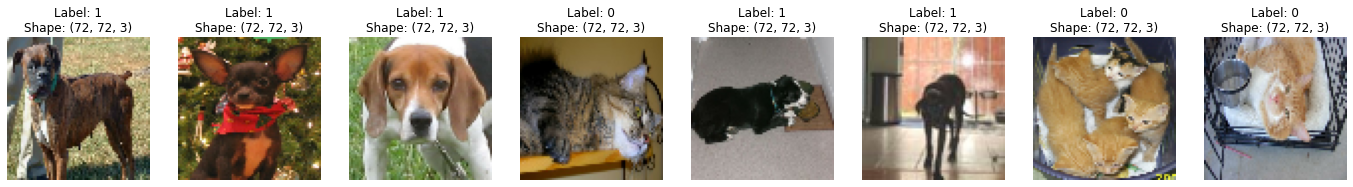

In [4]:
def encode(image, label):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image_encoded = tf.image.resize(image_encoded, (image_size, image_size))
    return image_encoded, label

dataset = dataset_train_original.map(lambda image, label: encode(image, label))

index = 1
num_samples = 8
plt.figure(figsize=(24, 4))
for image, label in dataset.take(num_samples):
    plt.subplot(1, num_samples, index)
    plt.imshow(image)
    plt.title(f"Label: {label}\nShape: {image.shape}")
    plt.axis("off")
    index += 1

In [5]:
dataset_train = dataset_train_original.map(lambda image, label: encode(image, label)).cache().shuffle(25000).batch(batch_size)
dataset_validate = dataset_validate_original.map(lambda image, label: encode(image, label)).cache().batch(batch_size)
dataset_test = dataset_test_original.map(lambda image, label: encode(image, label)).cache().batch(batch_size)

In [6]:
history_list = {}
epochs = 25

def render_history(history):
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.title("Our losses")
    plt.show()
    plt.close()

    plt.plot(history["accuracy"], label="accuracy")
    plt.plot(history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.title("Our accuracies")
    plt.show()
    plt.close()


def compare_histories():
    for training_name, history in history_list.items():
        plt.plot(history["val_accuracy"], label=training_name)
    plt.legend()
    plt.title("Comparison of val_accuracy")
    plt.show()
    plt.close()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15552)             0         
                                                                 
 dense (Dense)               (None, 2048)              31852544  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

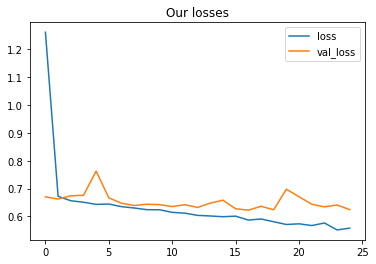

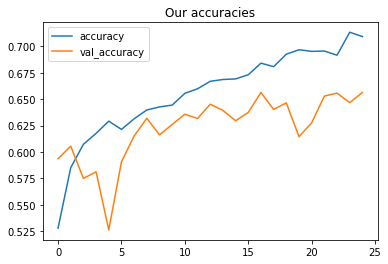

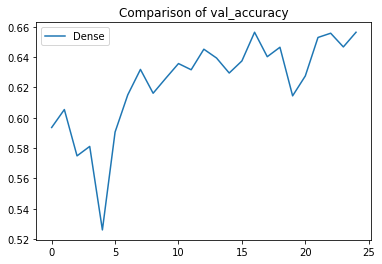

In [7]:
model = models.Sequential()

model.add(layers.Input(shape=(image_size, image_size, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation="relu"))
model.add(layers.Dropout(0.0))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.0))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.0))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.0))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_validate
)

history_list["Dense"] = history.history
render_history(history.history)
compare_histories()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 35, 35, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

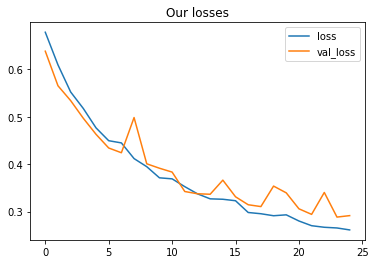

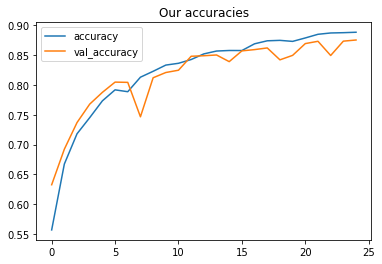

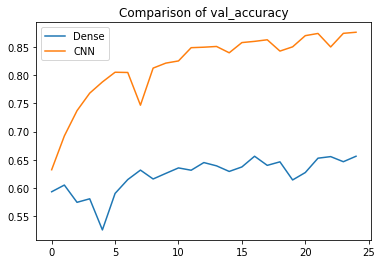

In [8]:
model = models.Sequential()

model.add(layers.Input(shape=(image_size, image_size, 3)))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_validate
)

history_list["CNN"] = history.history
render_history(history.history)
compare_histories()
tf.keras.backend.clear_session()

In [9]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

(1, 72, 72, 3)


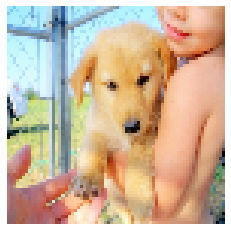

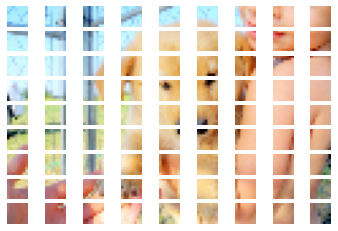

In [16]:
patch_size = 8

dataset = dataset_train_original.map(lambda image, label: encode(image, label)).shuffle(1000).batch(1)
patches_layer = Patches(patch_size = patch_size)

for image_batch, _ in dataset.take(1):
  #Render original image
  print(image_batch.shape)
  plt.imshow(image_batch[0])
  plt.axis('off')
  plt.show()

  #Rander_patches
  patches = patches_layer(image_batch)
  n = int(np.sqrt(patches.shape[1]))
  for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n,n,i+1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

In [18]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

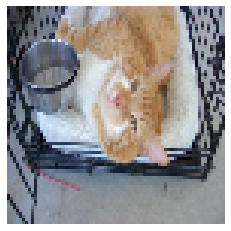

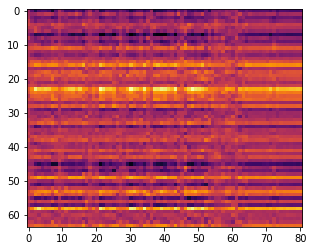

In [19]:
patch_size = 8
num_patches = (image_size // patch_size) ** 2
embed_dim = 64 # Consider going down.

dataset = dataset_train_original.map(lambda image, label: encode(image, label)).shuffle(100).batch(1)
patches_layer = Patches(patch_size=patch_size)
patch_encoder_layer = PatchEncoder(num_patches=num_patches, projection_dim=embed_dim)

for image_batch, _ in dataset.take(1):
    
    # Render original image.
    plt.imshow(image_batch[0])
    plt.axis("off")
    plt.show()
    
    # Render encoded patches.
    patches = patches_layer(image_batch)
    patch_encoding = patch_encoder_layer(patches)
    plt.imshow(patch_encoding[0].numpy().transpose(), cmap="inferno")

In [20]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, dropout, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=dropout)
        self.dense_proj = tf.keras.Sequential(
            [
             layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),
             ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs):
        attention_output = self.attention(inputs, inputs)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [25]:
patch_size = 8
num_patches = 81
num_heads = 2
num_encoders = 4
embed_dim = 64

model = models.Sequential()
model.add(layers.Input(shape=(image_size, image_size, 3)))
model.add(Patches(patch_size=patch_size))
model.add(PatchEncoder(num_patches=num_patches, projection_dim=embed_dim))
for _ in range(num_encoders):
  model.add(TransformerEncoder(embed_dim=embed_dim, dense_dim=embed_dim*2, num_heads=num_heads, dropout=0.0))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 patches_7 (Patches)         (None, None, 192)         0         
                                                                 
 patch_encoder_4 (PatchEncod  (None, 81, 64)           17536     
 er)                                                             
                                                                 
 transformer_encoder_8 (Tran  (None, 81, 64)           50048     
 sformerEncoder)                                                 
                                                                 
 transformer_encoder_9 (Tran  (None, 81, 64)           50048     
 sformerEncoder)                                                 
                                                                 
 transformer_encoder_10 (Tra  (None, 81, 64)           50048     
 nsformerEncoder)                                    

Epoch 1/25
128/128 [==============================] - 9s 45ms/step - loss: 0.8362 - accuracy: 0.5249 - val_loss: 0.6943 - val_accuracy: 0.5781
Epoch 2/25
128/128 [==============================] - 5s 42ms/step - loss: 0.6358 - accuracy: 0.6345 - val_loss: 0.5903 - val_accuracy: 0.6873
Epoch 3/25
128/128 [==============================] - 5s 39ms/step - loss: 0.5813 - accuracy: 0.6910 - val_loss: 0.6448 - val_accuracy: 0.6327
Epoch 4/25
128/128 [==============================] - 6s 45ms/step - loss: 0.5222 - accuracy: 0.7346 - val_loss: 0.5364 - val_accuracy: 0.7335
Epoch 5/25
128/128 [==============================] - 5s 39ms/step - loss: 0.4806 - accuracy: 0.7665 - val_loss: 0.5282 - val_accuracy: 0.7337
Epoch 6/25
128/128 [==============================] - 5s 39ms/step - loss: 0.4496 - accuracy: 0.7855 - val_loss: 0.5173 - val_accuracy: 0.7436
Epoch 7/25
128/128 [==============================] - 5s 41ms/step - loss: 0.4111 - accuracy: 0.8099 - val_loss: 0.5271 - val_accuracy: 0.7541

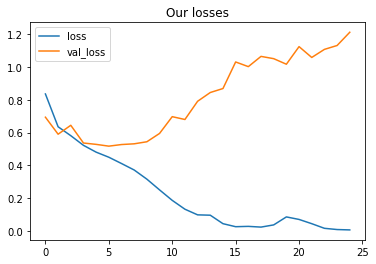

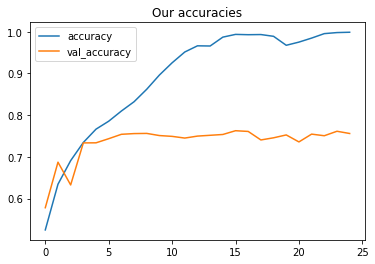

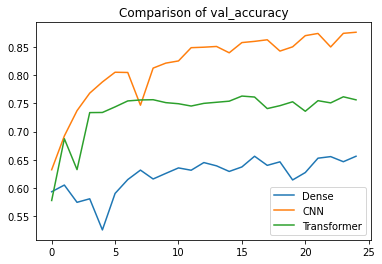

In [26]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_validate
)

history_list["Transformer"] = history.history
render_history(history.history)
compare_histories()
tf.keras.backend.clear_session()